<a href="https://colab.research.google.com/github/unforgettablexD/yolov4-distance-estimator/blob/main/DETECTION_DEFECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**

# New Section

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import numpy as np

**Unzip the dataset**

In [ ]:
!unzip NEU.zip

Archive:  NEU.zip
   creating: NEU-1/train/
   creating: NEU-1/train/cr/
  inflating: NEU-1/train/cr/crazing_1.jpg  
  inflating: NEU-1/train/cr/crazing_10.jpg  
  inflating: NEU-1/train/cr/crazing_100.jpg  
  inflating: NEU-1/train/cr/crazing_101.jpg  
  inflating: NEU-1/train/cr/crazing_102.jpg  
  inflating: NEU-1/train/cr/crazing_103.jpg  
  inflating: NEU-1/train/cr/crazing_104.jpg  
  inflating: NEU-1/train/cr/crazing_105.jpg  
  inflating: NEU-1/train/cr/crazing_106.jpg  
  inflating: NEU-1/train/cr/crazing_107.jpg  
  inflating: NEU-1/train/cr/crazing_108.jpg  
  inflating: NEU-1/train/cr/crazing_109.jpg  
  inflating: NEU-1/train/cr/crazing_11.jpg  
  inflating: NEU-1/train/cr/crazing_110.jpg  
  inflating: NEU-1/train/cr/crazing_111.jpg  
  inflating: NEU-1/train/cr/crazing_112.jpg  
  inflating: NEU-1/train/cr/crazing_113.jpg  
  inflating: NEU-1/train/cr/crazing_114.jpg  
  inflating: NEU-1/train/cr/crazing_115.jpg  
  inflating: NEU-1/train/cr/crazing_116.jpg  
  inflating

In [ ]:
#extract zip files
try:
    source1 = "NEU-1/train"
    os.mkdir("NEU-1/test")
    dest11 = "NEU-1/test"
    files = os.listdir(source1)
  
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.08) 
        #as we need to validate the performnance of the model, we are splitting the dataset into training and testing
        #80% goes for training and rest 20 for testing. split as 
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("Directories exist")

**Now divide the dataset into test and validation datasets using ImageDataGenerator**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, #we are flipping the images horizontally and setting the optimal shear and zoom range
    shear_range=0.2, # angle at which photo is tilted
    zoom_range=0.2,  # zooming in the picture
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'NEU-1/train',
        target_size=(200, 200), #200 x 200 is resolution of the image
        batch_size=10, #images are split in batches of 10
        class_mode='categorical') #black and white image

validation_generator = test_datagen.flow_from_directory(
        'NEU-1/validation',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 114 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Defining a callback function**

In [ ]:
class myCallback(tf.keras.callbacks.Callback): #stops training when accuracy is high
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95 ):
            print("\n The model has reached an accuracy of 95%")
            self.model.stop_training = True 

# **Defining the CNN based model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
]) #10 layers
 #say what conv2d and maxpooling does
 # talk about relu
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 24, 128)     

**Compiling the model**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!') #explain compiling model

Compiled!


**Training the model for 20 Epochs with a batch size of 32**

In [ ]:
callbacks = myCallback() # stop training when accuracy is high
history = model.fit(train_generator, #training part
        steps_per_epoch = 20,
        batch_size = 32,
        epochs=100, #20 epochs
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/100
20/20 [==============================] - 21s 1s/step - loss: 2.3890 - accuracy: 0.2450 - val_loss: 1.6672 - val_accuracy: 0.4639
Epoch 2/100
20/20 [==============================] - 20s 1s/step - loss: 1.8080 - accuracy: 0.2500 - val_loss: 1.6867 - val_accuracy: 0.3389
Epoch 3/100
20/20 [==============================] - 20s 989ms/step - loss: 1.7525 - accuracy: 0.2800 - val_loss: 1.6577 - val_accuracy: 0.2833
Epoch 4/100
20/20 [==============================] - 21s 1s/step - loss: 1.6871 - accuracy: 0.3050 - val_loss: 1.4951 - val_accuracy: 0.5694
Epoch 5/100
20/20 [==============================] - 21s 1s/step - loss: 1.4985 - accuracy: 0.4350 - val_loss: 1.4161 - val_accuracy: 0.3944
Epoch 6/100
20/20 [==============================] - 20s 985ms/step - loss: 1.4602 - accuracy: 0.4350 - val_loss: 1.5381 - val_accuracy: 0.3972
Epoch 7/100
20/20 [==============================] - 23s 1s/step - loss: 1.5891 - accuracy: 0.4050 - val_loss: 2.2878 - val_accuracy: 0.2583
Epoch 8

**Plotting model accuracy using the plot library**

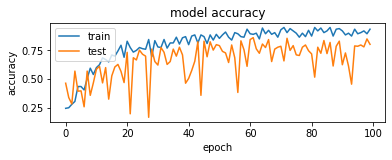

In [ ]:
import matplotlib.pyplot as plt #so we are using plt library to determine the accuracy of the algorithm
plt.figure(1)                   # our accuracy is at 80-90%
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

**Preparing the data for prediction**

In [ ]:
!unzip test.zip

unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.


In [ ]:
from sklearn.datasets import load_files
import numpy as np

test_dir = '/content/NEU-1/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [ ]:
no_of_classes = len(np.unique(y_test)) #number of defects. mention the types of defects
no_of_classes

6

In [ ]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (1326, 200, 200, 3)


In [ ]:
x_test = x_test.astype('float32')/255

**Visualizing the predictions**

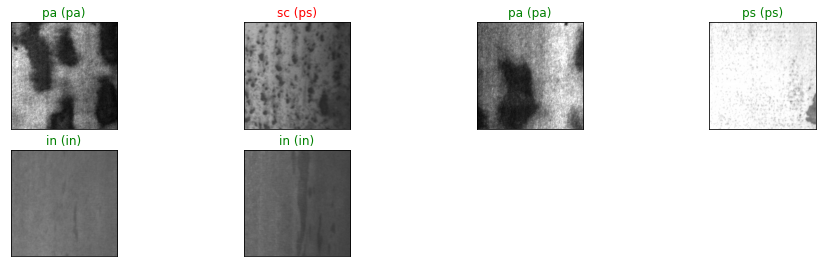

In [ ]:
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=6, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))